In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
# 打印数据集的列
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### 经过探索，我们知道OverallQual，YearBuilt，TotalBsmtSF，GrLivArea等属性比较重要（后面会解释为什么）
#### 下面我们先处理目标变量SalePrice，这是一件非常重要的事

In [4]:
pd.Series.describe(df_train['SalePrice'])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*SalePrice都大于0，确保我们的模型不会再最终受到损坏*

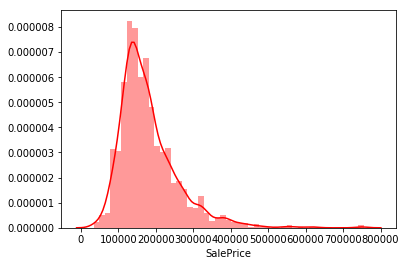

In [5]:
sns.distplot(df_train['SalePrice'], color='red')

#### 查看SalePrice的条形图，可以看出如下三个特点
+ 偏离正态分布
+ 体现出明显的正偏度（右边的尾巴比较长）
+ 体现出明显的峰值（尖尖的波峰）

####  *补充一点知识：正态分布的偏度为0，大于0的数据分布右边的尾巴会比较长，小于0则左边的尾巴比较长；另外，正态分布的峰度为3，大于3则是峰度偏高，波峰比较尖，反之峰度偏低，波峰比较扁平* 

In [6]:
print("SalePrice的数据分布的偏度为：%.3f" % (pd.Series.skew(df_train['SalePrice'])))
print("SalePrice的数据分布的峰度为：%.3f" % (pd.Series.kurt(df_train['SalePrice'])))

SalePrice的数据分布的偏度为：1.883
SalePrice的数据分布的峰度为：6.536


#### 结果和我们观察到的基本一致，偏度1.883>0，右边的尾巴比较长；峰度6.536>3，波峰会比较尖锐
#### 下面我们需要查看与SalePrice关系比较大的几个变量，它们与SalePrice究竟存在什么关系

## 首先是数值型的变量

In [7]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.head(5)

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


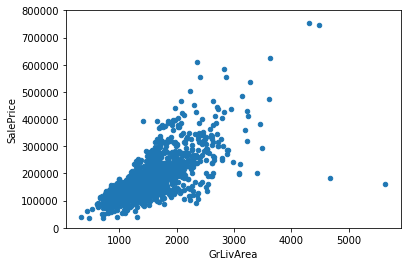

In [8]:
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))

可以看出这两个变量有明显的线性关系

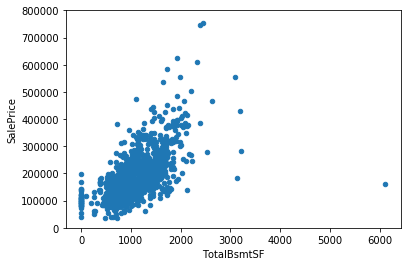

In [9]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

看上去TotalBsmtSF与SalePrice有很强的线性关系？（或者指数关系？）

## 然后是类别型的变量

(-0.5, 9.5, 0, 800000)

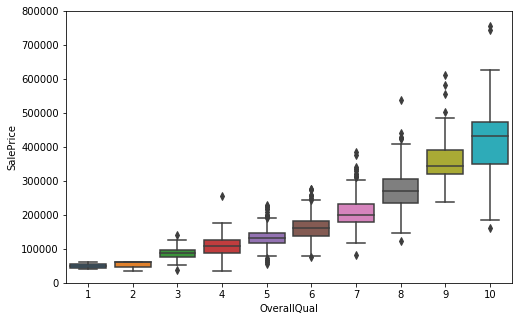

In [10]:
fig = plt.figure(figsize=(8, 5))
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
boxplot = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
boxplot.axis(ymin=0, ymax=800000)

观察一下箱线图的走势，也可以大致判断OverallQuall变量与SalePrice有线性关系

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

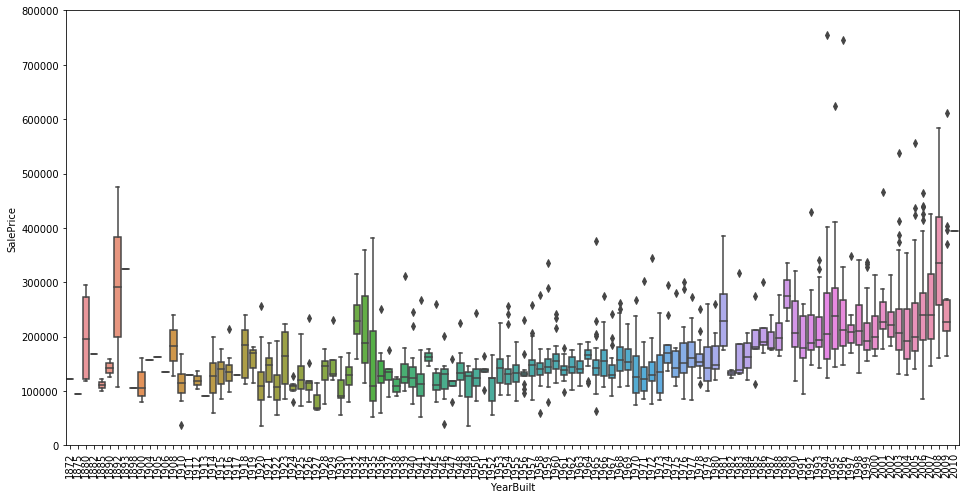

In [11]:
fig = plt.figure(figsize=(16, 8))
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
boxplot = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
boxplot.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90) # 旋转一下x轴下的数据避免重叠

似乎看起来趋势不是特别明显，但一般的直觉是越新的房子价格会更高.....

## 总结
+ GrLivArea，TotalBsmtSF与SalePrice存在线性相关关系，尤其TotalBsmtSF与SalePrice的关系图中，线性关系的斜率非常高
+ OverallQual，YearBuilt与SalePrice也存在相关关系，例如前者，随着OverallQual的增大，SalePrice也在上升

### 尽管我们凭借直觉看出这些关系，但显然不可靠，下面我们换一些其它的方式来分析特征之间的关系（关联矩阵和散点图）
+ Correlation matrix (heatmap style).
+ 'SalePrice' correlation matrix (zoomed heatmap style).
+ Scatter plots between the most correlated variables (move like Jagger style).

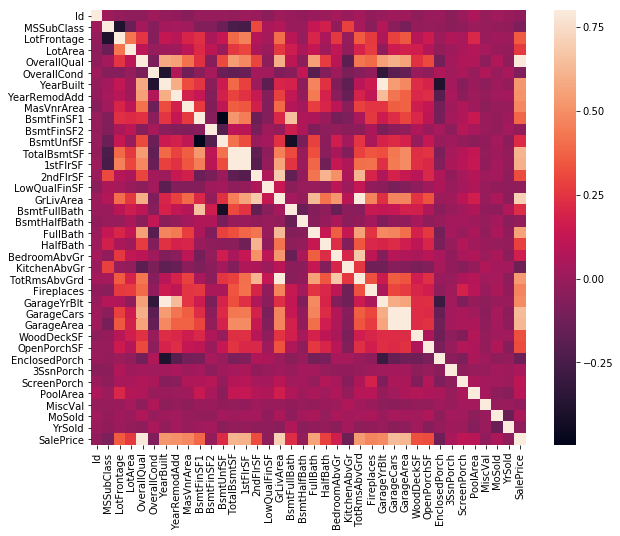

In [12]:
plt.figure(figsize=(10, 8))
corrmat = df_train.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

这是一个关联矩阵的热度图，颜色越亮代表正相关关系越明显，不难看出，TotalBsmtSF与1stFlrSF之间存在很明显的正相关关系，此外，GarageX字样的特征之间相关关系也很明显，如果两个特征之间的正相关关系明显意味着特征存在冗余，因为它们几乎表达了相同的信息，应该进行一些去重的工作。
### 上面绘制的是特征与特征之间的关联矩阵，我们还需要着重关注一下我们的目标变量SalePrice与其它特征之间的关联矩阵

In [13]:
k = 10
# 对关联矩阵的SalePrice列排序，获取最大的前k列，实际上就是得到与SalePrice列关系最大的前10个特征，特别的，关联关系最大的特征为其本身
corrmat.nlargest(k, 'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [14]:
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
df_train[cols].T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
SalePrice,208500,181500,223500,140000,250000,143000,307000,200000,129900,118000,...,136000,287090,145000,84500,185000,175000,210000,266500,142125,147500
OverallQual,7,6,7,7,8,5,8,7,7,5,...,5,8,5,5,7,6,6,7,5,5
GrLivArea,1710,1262,1786,1717,2198,1362,1694,2090,1774,1077,...,1792,1578,1072,1140,1221,1647,2073,2340,1078,1256
GarageCars,2,2,2,3,3,2,2,2,2,1,...,0,3,2,0,2,2,2,1,1,1
GarageArea,548,460,608,642,836,480,636,484,468,205,...,0,840,525,0,400,460,500,252,240,276
TotalBsmtSF,856,1262,920,756,1145,796,1686,1107,952,991,...,896,1573,547,1140,1221,953,1542,1152,1078,1256
1stFlrSF,856,1262,920,961,1145,796,1694,1107,1022,1077,...,896,1578,1072,1140,1221,953,2073,1188,1078,1256
FullBath,2,2,2,1,2,1,2,2,2,1,...,2,2,1,1,2,2,2,2,1,1
TotRmsAbvGrd,8,6,6,7,9,5,7,7,8,5,...,8,7,5,6,6,7,7,9,5,6
YearBuilt,2003,1976,2001,1915,2000,1993,2004,1973,1931,1939,...,1974,2008,2005,2006,2004,1999,1978,1941,1950,1965


In [15]:
cm = np.corrcoef(df_train[cols].values.T)
# 或者pd.DataFrame.corr(df_train[cols]).values
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

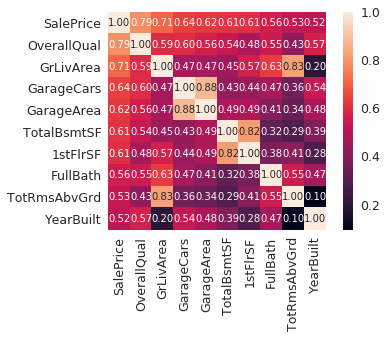

In [16]:
sns.set(font_scale=1.25)
sns.heatmap(cm, xticklabels=df_train[cols].columns, yticklabels=df_train[cols].columns, square=True, annot=True, fmt='.2f', annot_kws={'size': 10})

### 好了现在仔细看第一行/第一列，可以得出如下特点：
+ OverallQual,GrLivArea,TotalBsmtSF和SalePrice的相关关系确实很大，相关系数分别为0.79，0.71，0.61，应证了我们的猜想
+ GarageCars和GarageArea两个特征关系很大，很明显，车库区域面积大，停的车数量自然也就多了，因此这两个特征存在冗余，应该剔除一个，由于GarageCars与SalePrice的关联系数0.64大于后者的0.62，因此应该保留GarageCars，剔除GarageArea
+ TotalBsmtSF和1stFlrSF同理，剔除一个冗余特征，我们去掉后者（两个与SalePrice的关联系数都是0.61）
+ FullBath也保留下来
+ TotRmsAbvGrd和GrLivArea又出现特征冗余，后者在第2点处提到要保留了，因此去掉前者
+ YearBuilt看起来与SalePrice关联关系较小（与我们的猜测不符），不过由于这是一个时间特征，最好做一下时间序列分析会更好，现在姑且认为它与SalePrice有很强关系，直觉上来说，越新的房子（时间上）会越贵

### 接下来我们绘制一下这些关联特征与SalePrice之间的散点图吧

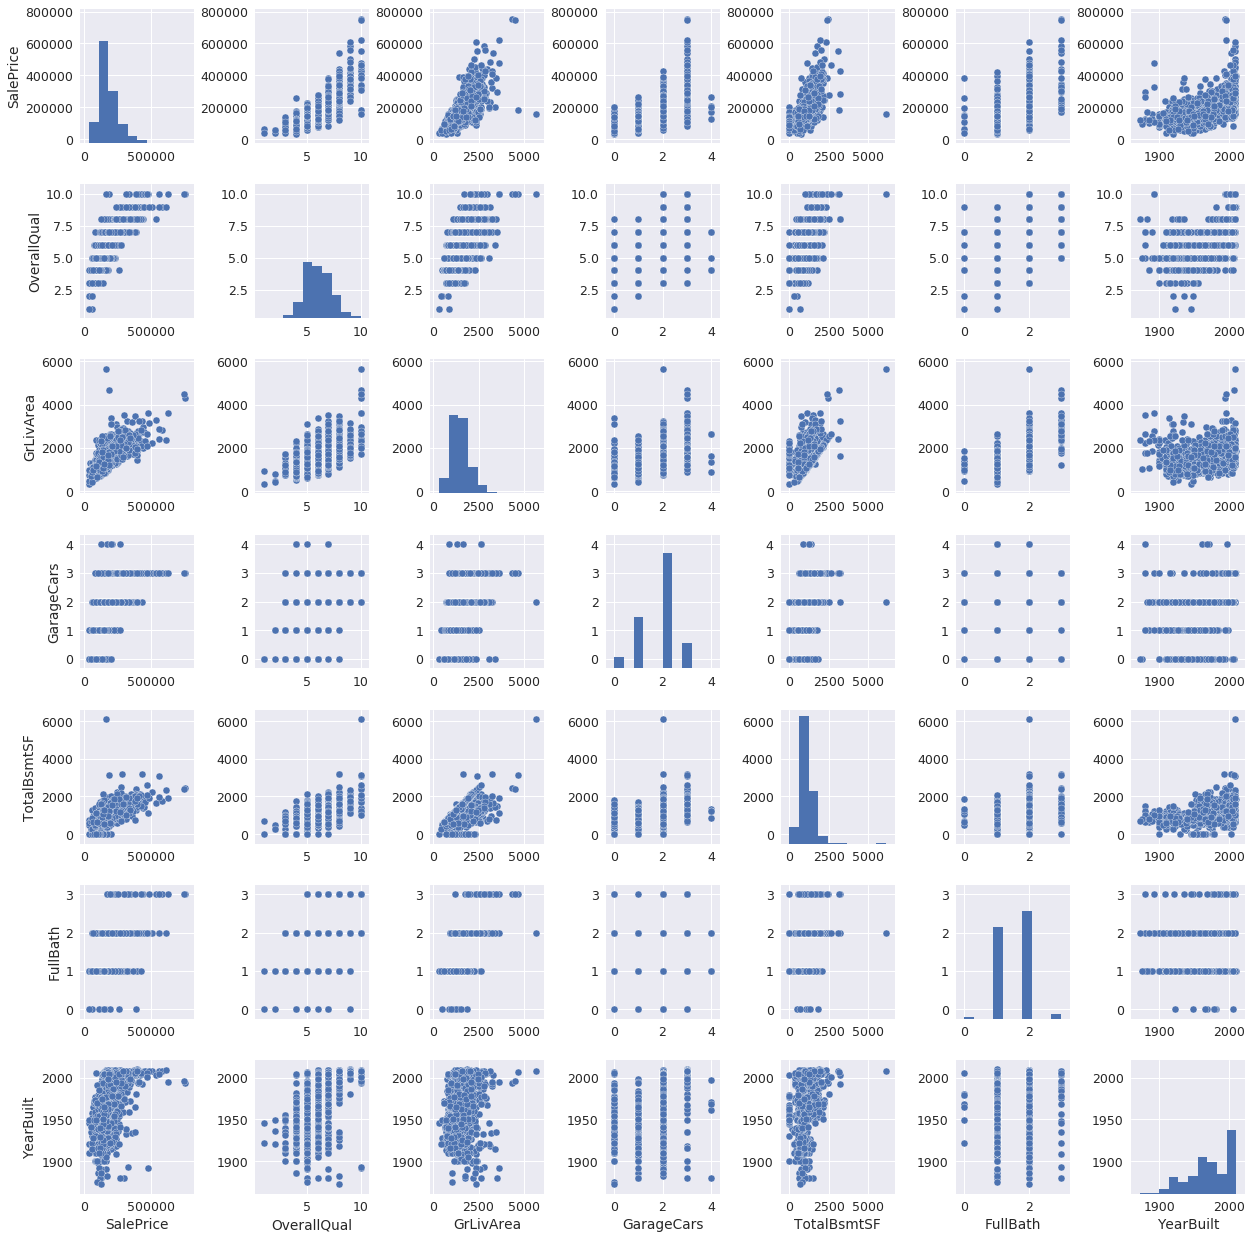

In [17]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols])

+ 注意到一个有趣的地方，TotalBsmtSF和GrLiveArea之间的散点图，明显的有一条类似于边界线的直线，所有的点位于其下方，这是因为地下室的面积不可能超过地上区域
+ 另外，观察一下左下角和右上角的散点图，YearBuilt和SalePrice有呈现指数增长的趋势，因此也正说明YearBuilt这个特征不能被丢弃。（房价增长飞快）

### 下面看看缺失值处理，好的缺失值处理也许能起到减少样本的作用，而且从实质角度来看，我们还要确保缺失值处理后不会引起偏差以及隐瞒一些不便的事实

In [18]:
df_train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [19]:
null_total = df_train.isnull().sum()
total = df_train.isnull().count() # 计算每个特征中非NA观测点的数目
percent = null_total / total
missing_data = pd.concat([null_total, total, percent], axis=1, keys=['Null Total', 'Total', 'Percent'])
pd.DataFrame.sort_values(missing_data, by=['Percent'], ascending=False).head(20)

,Null Total,Total,Percent
PoolQC,1453,1460,0.995205
MiscFeature,1406,1460,0.963014
Alley,1369,1460,0.937671
Fence,1179,1460,0.807534
FireplaceQu,690,1460,0.472603
LotFrontage,259,1460,0.177397
GarageYrBlt,81,1460,0.055479
GarageCond,81,1460,0.055479
GarageType,81,1460,0.055479
GarageFinish,81,1460,0.055479


+ 一般认为缺失比例如果超过15%，这些特征就应该被丢弃，也不再做后续的缺失值处理，例如'PoolQC', 'MiscFeature', 'Alley'这些特征应该被丢弃
+ GarageX系列特征缺失的数目相同，很有可能来自同一批样本，由于GarageCars之前被保留了而且没有缺失值吗，这些冗余又有缺失的特征还是丢弃掉，BsmtX系列特征同理全部删除
+ MasVnrArea和MasVnrType的缺失数目少，不过它们因为和YearBuilt和OverallQua有比较强的关系，应该被丢弃掉
+ 最后，Electrical特征只有一个缺失观测点，直接丢弃掉
+ 因此我们把所有

In [20]:
(missing_data['Null Total'] > 1).head()

Id             False
MSSubClass     False
MSZoning       False
LotFrontage     True
LotArea        False
Name: Null Total, dtype: bool

In [21]:
missing_data[missing_data['Null Total'] > 1].head()
# 删除Null Total大于1的行

,Null Total,Total,Percent
LotFrontage,259,1460,0.177397
Alley,1369,1460,0.937671
MasVnrType,8,1460,0.005479
MasVnrArea,8,1460,0.005479
BsmtQual,37,1460,0.025342


In [22]:
df_train = df_train.drop((missing_data[missing_data['Null Total'] > 1]).index, axis=1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

### 离群点分析，下面通过SalePrice的标准差来看看进行快速分析（单变量分析）

In [23]:
scaleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])

In [24]:
low_range = scaleprice_scaled[np.argsort(scaleprice_scaled[:, 0])][:10]
high_range = scaleprice_scaled[np.argsort(scaleprice_scaled[:, 0])][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


### 注意到标准正态分布的均值为0，方差为1，按照3σ原则，如下：
+ 数值分布在（μ-σ,μ+σ)中的概率为0.6826
+ 数值分布在（μ-2σ,μ+2σ)中的概率为0.9544
+ 数值分布在（μ-3σ,μ+3σ)中的概率为0.9974

### 因此99%的数据会落在(-3,3)这个区间内，观察结果，low range的数据还好，基本上都是-1点几，离0不算太远，high range数据问题比较大，全部都超过了3，甚至还有到7的，现在我们还不将这些值看成离群点，不过我们应该小心两个7点几的观测点。
### 下面看看双变量分析

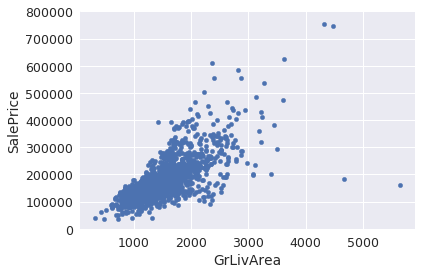

In [25]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))

+ 首先右下方有两个明显的离群点（GrLivArea最大的两个），猜测这两个点来自农业区域，因此价格会比较低，这两个点应该删去
+ 最上方比较高的两个点就是那两个标准化后7点几的点，看起来它们似乎有跟随着其它点的走势，因此先保留它们

In [26]:
df_train.sort_values(by='GrLivArea', ascending=False)[:2]
# 删除Id为1299和524的

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [27]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index, axis=0)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index, axis=0)

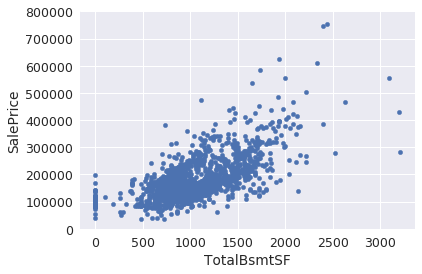

In [28]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

### 原作者认为TotalBsmtSF大于3000的也许需要淘汰，但不值得花那么多时间去做这件事，因此保留它们，下面看一下多变量分析
### 多变量分析基于4点：
+ Normality，让数据看起来像正态分布，许多重要的统计检验是基于正态分布的，比如T-假设检验，这里仅为SalePrice做单变量的规范化，不过需要注意的是单变量的规范化不能保证多变量的规范化，另外，样本数目大于200时规范化就不是主要问题了，不过解决规范化仍有助于避免很多问题。
+ Homoscedasticity，（一个或多个）因变量在预测（自）变量范围内表现出相等的方差水平，我们希望误差项在自变量的所有值中都是相同的。
+ Linearity，如果因变量和自变量之间呈现不出线性模式，则非常值得做一些数据变换
+ Absence of correlated errors，即误差与误差之间也有关系，如果一个正误差系统地引起一个负误差，那么说明这些变量之间有关系，时间序列分析中经常出现此问题

### normality的探索注意以下两种方式：
+ Histogram的峰度和偏度
+ Normal probability plot：这种图的特点是，数据的分布接近于对角线代表正态分布

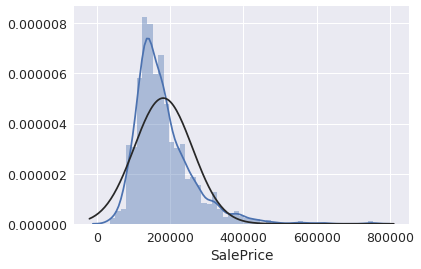

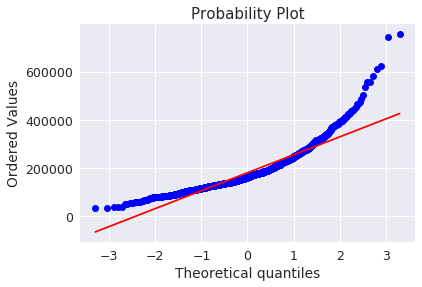

In [29]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
# 黑色线为标准正态分布

+ 主要问题：明显的尖尖的波峰，正的偏度，数据分布没有靠近对角线，但没有丢失任何信息
+ 如果偏度为正，可以使用log函数将数据转换为接近正态分布的数据分布

In [30]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

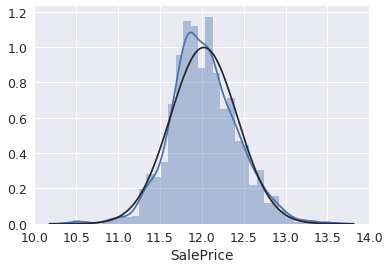

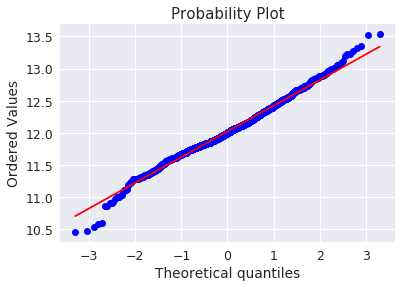

In [31]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

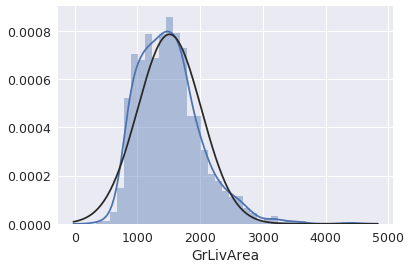

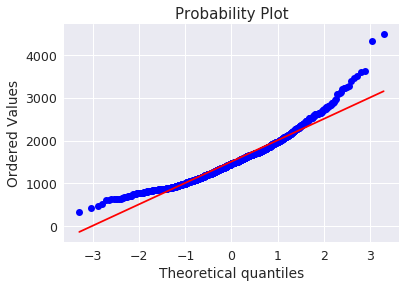

In [32]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

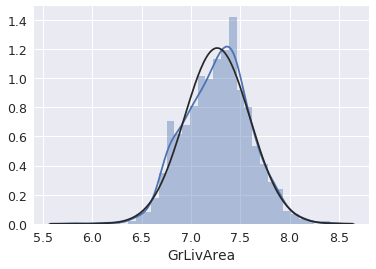

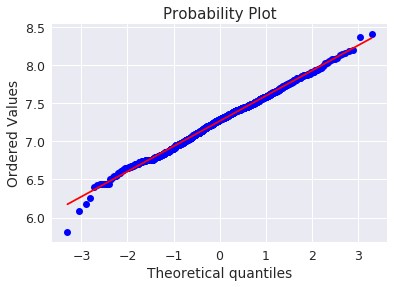

In [33]:
# 同理
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([   0,    0,    0, ..., 3094, 3200, 3206])),
 (408.0232985397026, 1052.995881949211, 0.982143593372206))

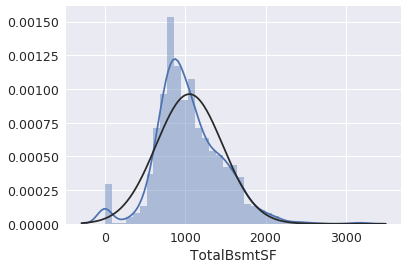

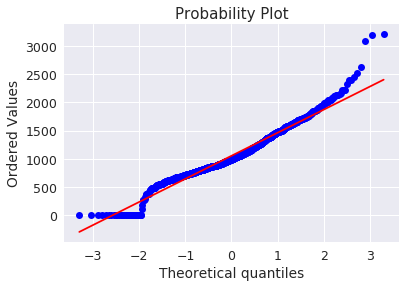

In [34]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
stats.probplot(df_train['TotalBsmtSF'], plot=plt)

### 现在有几个问题
+ 首先是图像呈现出较大的峰度
+ 其次是有一大波观测点的值为0（这些观测点没有地下室）
+ 最后是log变换不能用在0上

### 为此，我们要创建一个变量指示有没有地下室，忽略所有没有地下室的观测点，log变换仅用在非0观测点上

In [37]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train['TotalBsmtSF'].index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1
# df_train[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] 错误写法
# df_train[df_train['TotalBsmtSF'] > 0]['HasBsmt'] 正确写法

In [40]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
#.apply(np.log)

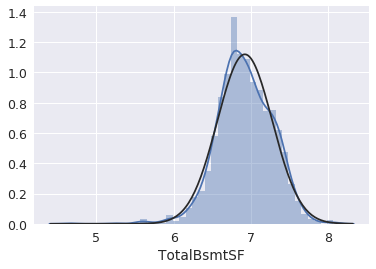

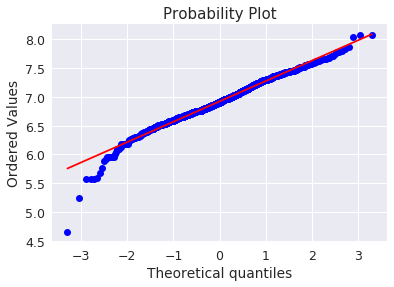

In [41]:
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

因为用了log变换进行了规范化，实际上Homoscedasticity的问题也已经解决了（在双变量的散点图中，如果有Homoscedasticity问题，那么数据分布会呈现出锥形（一头小一头大），或者钻石型（中间集中了很多数据点）），下面看看变换后的图，比起未变换之前的已经好很多了。

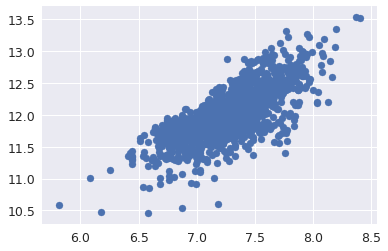

In [42]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

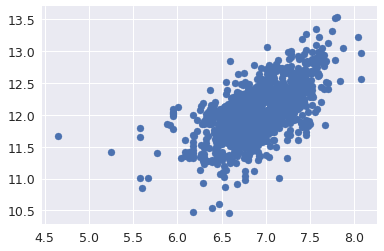

In [43]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

### 最后将类别型变量转成dummy

In [44]:
df_train = pd.get_dummies(df_train)

**Refereneces:** [https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)